In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('downloads/mnist_train.csv')

In [11]:
data  = df.values

In [12]:
X = data[:,1:]
Y = data[:,0]

In [13]:
XT,Xt,YT,Yt = train_test_split(X,Y,test_size= 0.2)

In [29]:
XT.shape

(48000, 784)

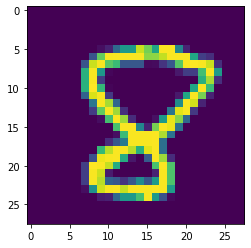

In [43]:
plt.imshow(XT[80].reshape(28,28))

# Preprocessing part

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

In [33]:
X_ = sc.fit_transform(XT) # standardized data

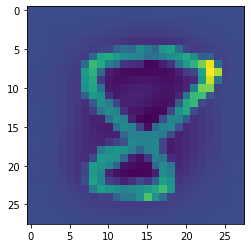

In [44]:
plt.imshow(X_[80].reshape(28,28))

# Sklearn PCA

In [39]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components =2)

In [55]:
X_pca = pca.fit_transform(X_)

In [56]:
X_pca.shape

(48000, 2)

In [57]:
X_pca

array([[-1.50762988, -1.29840695],
       [-4.37872383, -3.06062661],
       [-7.75863152,  1.18066495],
       ...,
       [-2.21166599, -1.70558928],
       [-5.53774492, -1.94838909],
       [18.6580061 ,  2.75736648]])

In [58]:
pca.explained_variance_

array([40.58962535, 29.25899183])

# Custom PCA

In [59]:
#step 2 = compute the covariance matrix

In [61]:
cov_mat = np.dot(X_.T , X_)

In [63]:
cov_mat.shape

(784, 784)

In [64]:
# step 3 = compute the eigen vectors

In [67]:
from numpy.linalg import svd

In [69]:
U,S,V = svd(cov_mat)

In [70]:
U.shape

(784, 784)

In [72]:
Ured = U[:, :2]

In [73]:
Ured.shape

(784, 2)

In [76]:
# step 4 = projection of the data on the new line or vector or axis

In [109]:
z = np.dot(X_,Ured)

In [110]:
z.shape

(48000, 2)

# Data Visualisation 

In [89]:
YT.shape

(48000,)

In [111]:
newdataset = np.hstack((z,YT.reshape(48000,1)))

In [112]:
df = pd.DataFrame(newdataset, columns = ['PCA1', 'PCA2', 'label'])

In [113]:
df.head()

,PCA1,PCA2,label
0,1.507569,1.298891,9.0
1,4.378716,3.060592,6.0
2,7.758583,-1.180224,9.0
3,-14.639534,3.352526,0.0
4,3.675382,3.181597,8.0


In [114]:
import seaborn as sns

<Figure size 1080x1080 with 0 Axes>

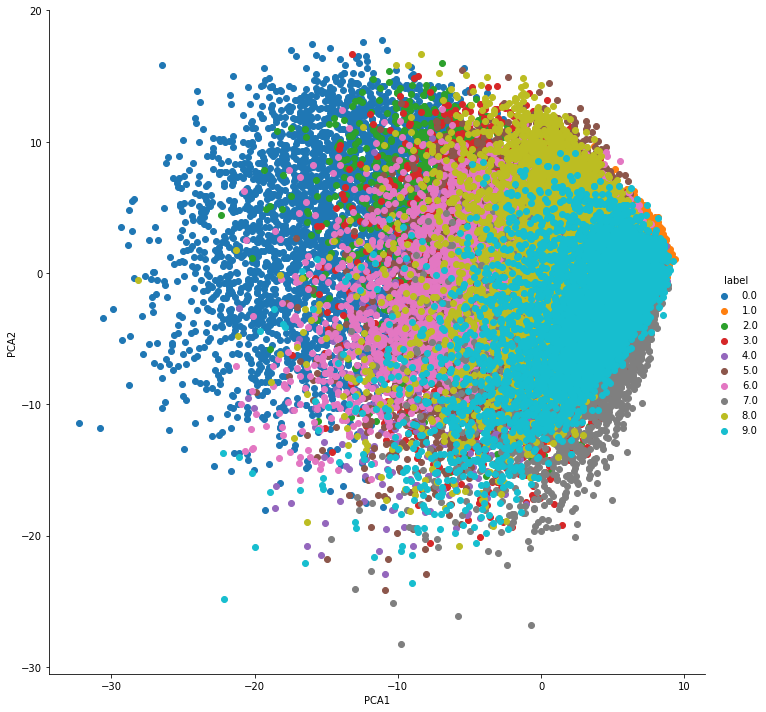

In [115]:
plt.figure(figsize = (15,15))
fg = sns.FacetGrid(df, hue = "label", height = 10)
fg.map(plt.scatter , "PCA1", "PCA2")
fg.add_legend()
plt.show()